In [ ]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
import pandas as pd
dataset1=pd.read_csv('keystroke_datax.csv')
dataset2=pd.read_csv('keystroke_datax2.csv')
dataset1['Label'] = 0
dataset2['Label'] = 1


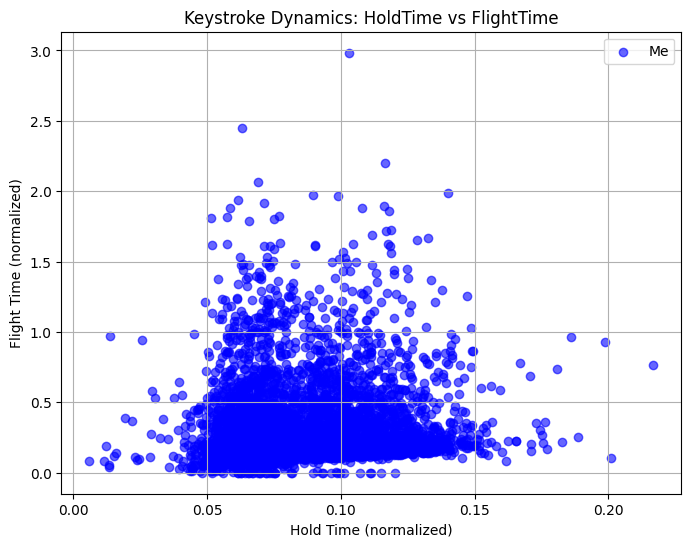

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(dataset1['HoldTime'], dataset1['FlightTime'], label='Me', alpha=0.6, c='blue')


plt.title('Keystroke Dynamics: HoldTime vs FlightTime')
plt.xlabel('Hold Time (normalized)')
plt.ylabel('Flight Time (normalized)')
plt.legend()
plt.grid(True)
plt.show()

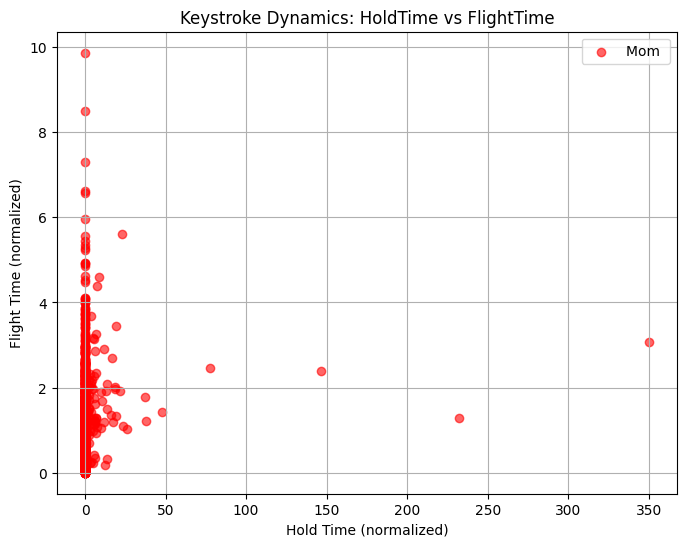

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(dataset2['HoldTime'], dataset2['FlightTime'], label='Mom ', alpha=0.6, c='red')

plt.title('Keystroke Dynamics: HoldTime vs FlightTime')
plt.xlabel('Hold Time (normalized)')
plt.ylabel('Flight Time (normalized)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
combined = pd.concat([dataset1, dataset2], ignore_index=True)
combined

,Key,HoldTime,FlightTime,DigraphLatency,Label
0,i,0.0655,0.0000,0.0000,0
1,n,0.0737,0.1966,0.1884,0
2,NaN,0.0821,1.2957,1.2873,0
3,NaN,0.0946,0.5952,0.5827,0
4,NaN,0.0631,0.2647,0.2961,0
...,...,...,...,...,...
10438,c,0.1288,0.6540,0.6130,1
10439,i,0.0998,0.1602,0.1892,1
10440,t,0.1296,0.2238,0.1940,1
10441,y,0.0829,0.1778,0.2245,1


In [ ]:
from sklearn.utils import shuffle
combined = shuffle(combined, random_state=42).reset_index(drop=True)


In [ ]:
# Threshold values in seconds (tweak if needed)
MAX_HOLD_TIME = 2.0
MAX_FLIGHT_TIME = 2.0
MAX_DIGRAPH_LATENCY = 2.0

# Remove rows with extreme outliers
combined_cleaned = combined[
    (combined['HoldTime'] <= MAX_HOLD_TIME) &
    (combined['FlightTime'] <= MAX_FLIGHT_TIME) &
    (combined['DigraphLatency'] <= MAX_DIGRAPH_LATENCY)
].reset_index(drop=True)

print("Original shape:", combined.shape)
print("After cleaning:", combined_cleaned.shape)

# Preview cleaned data
combined_cleaned.head()


Original shape: (10443, 5)
After cleaning: (10181, 5)


,Key,HoldTime,FlightTime,DigraphLatency,Label
0,e,0.0792,0.1567,0.1717,1
1,h,0.0877,0.6155,0.6462,1
2,a,0.1228,0.5914,0.5751,0
3,e,0.0980,0.1298,0.1312,1
4,d,0.0645,0.2776,0.2791,0


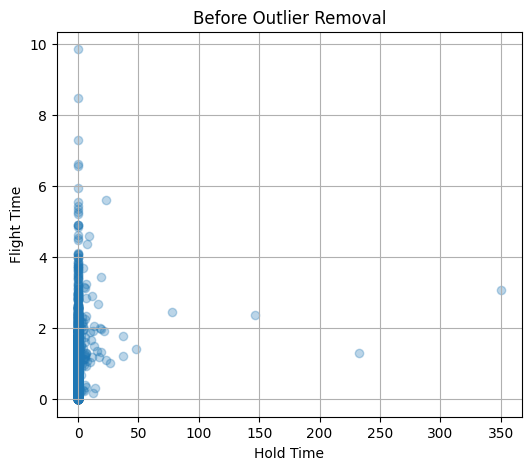

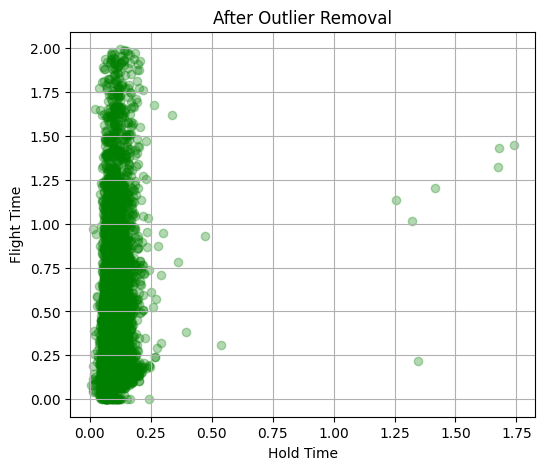

In [ ]:
import matplotlib.pyplot as plt

# Before cleaning
plt.figure(figsize=(6, 5))
plt.scatter(combined['HoldTime'], combined['FlightTime'], alpha=0.3)
plt.title("Before Outlier Removal")
plt.xlabel("Hold Time")
plt.ylabel("Flight Time")
plt.grid(True)
plt.show()

# After cleaning
plt.figure(figsize=(6, 5))
plt.scatter(combined_cleaned['HoldTime'], combined_cleaned['FlightTime'], alpha=0.3, color='green')
plt.title("After Outlier Removal")
plt.xlabel("Hold Time")
plt.ylabel("Flight Time")
plt.grid(True)
plt.show()


In [ ]:
X = combined[['HoldTime', 'FlightTime']].values
y = combined['Label'].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5489 - loss: 0.6767
Epoch 2/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5922 - loss: 0.6634
Epoch 3/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6014 - loss: 0.6566
Epoch 4/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6093 - loss: 0.6486
Epoch 5/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6149 - loss: 0.6435
Epoch 6/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6281 - loss: 0.6396
Epoch 7/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6447 - loss: 0.6270
Epoch 8/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6507 - loss: 0.6184
Epoch 9/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6481 - loss: 0.6123
Epoch 10/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6565 - loss: 0.5986
Epoch 11/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6573 - loss: 0.5966
Epoch 12/100
262/262 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


X = combined[['HoldTime', 'FlightTime', 'DigraphLatency']]
y = combined['Label']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------ RANDOM FOREST ------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

print(" Random Forest Accuracy:", round(rf_acc * 100, 2), "%")
print(classification_report(y_test, rf_preds))

# ------------------ SUPPORT VECTOR MACHINE (SVM) ------------------
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can try 'linear' too
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)

print("🔍 SVM Accuracy:", round(svm_acc * 100, 2), "%")
print(classification_report(y_test, svm_preds))


 Random Forest Accuracy: 77.69 %
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1080
           1       0.77      0.77      0.77      1009

    accuracy                           0.78      2089
   macro avg       0.78      0.78      0.78      2089
weighted avg       0.78      0.78      0.78      2089

🔍 SVM Accuracy: 59.69 %
              precision    recall  f1-score   support

           0       0.58      0.76      0.66      1080
           1       0.62      0.42      0.50      1009

    accuracy                           0.60      2089
   macro avg       0.60      0.59      0.58      2089
weighted avg       0.60      0.60      0.58      2089



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


X = combined[['HoldTime', 'FlightTime', 'DigraphLatency']]
y = combined['Label']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------ K-NEAREST NEIGHBORS ------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)

print(" KNN Accuracy:", round(knn_acc * 100, 2), "%")
print(classification_report(y_test, knn_preds))

# ------------------ LOGISTIC REGRESSION ------------------
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_preds)

print(" Logistic Regression Accuracy:", round(logreg_acc * 100, 2), "%")
print(classification_report(y_test, logreg_preds))


 KNN Accuracy: 69.22 %
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1080
           1       0.69      0.66      0.67      1009

    accuracy                           0.69      2089
   macro avg       0.69      0.69      0.69      2089
weighted avg       0.69      0.69      0.69      2089

 Logistic Regression Accuracy: 60.84 %
              precision    recall  f1-score   support

           0       0.59      0.81      0.68      1080
           1       0.66      0.39      0.49      1009

    accuracy                           0.61      2089
   macro avg       0.62      0.60      0.59      2089
weighted avg       0.62      0.61      0.59      2089

